# Assignment-1 (KNN Classifier)-Part-A
## Handwritten digit recognition
In this assignment part-A, we will use the built-in library ``sklearn`` to use KNN classifier.

## The MNIST dataset
`MNIST` is a classic dataset in machine learning, consisting of 28x28 gray-scale images handwritten digits. The training set contains 60,000 examples and the test set contains 10,000 examples. In this assignment we will further split the training set to take out 12,000 examples as a validation step.

In [1]:
%matplotlib inline
import gzip, os
import numpy as np
import matplotlib.pyplot as plt
import time
from urllib.request import urlretrieve

In [2]:
# Function that downloads a specified MNIST data file from Yann Le Cun's website
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# Invokes download() if necessary, then reads in images
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [3]:
## Load the training set
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

## Load the testing set
test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

In [4]:
## Print out their dimensions
print("Training dataset dimensions: ", np.shape(train_data))
print("Number of training labels: ", len(train_labels))
print("Testing dataset dimensions: ", np.shape(test_data))
print("Number of testing labels: ", len(test_labels))

Training dataset dimensions:  (60000, 784)
Number of training labels:  60000
Testing dataset dimensions:  (10000, 784)
Number of testing labels:  10000


In [5]:
## Compute the number of examples of each digit
train_digits, train_counts = np.unique(train_labels, return_counts=True)
print("Training set distribution:")
print(dict(zip(train_digits, train_counts)))

test_digits, test_counts = np.unique(test_labels, return_counts=True)
print("Test set distribution:")
print(dict(zip(test_digits, test_counts)))

Training set distribution:
{np.uint8(0): np.int64(5923), np.uint8(1): np.int64(6742), np.uint8(2): np.int64(5958), np.uint8(3): np.int64(6131), np.uint8(4): np.int64(5842), np.uint8(5): np.int64(5421), np.uint8(6): np.int64(5918), np.uint8(7): np.int64(6265), np.uint8(8): np.int64(5851), np.uint8(9): np.int64(5949)}
Test set distribution:
{np.uint8(0): np.int64(980), np.uint8(1): np.int64(1135), np.uint8(2): np.int64(1032), np.uint8(3): np.int64(1010), np.uint8(4): np.int64(982), np.uint8(5): np.int64(892), np.uint8(6): np.int64(958), np.uint8(7): np.int64(1028), np.uint8(8): np.int64(974), np.uint8(9): np.int64(1009)}


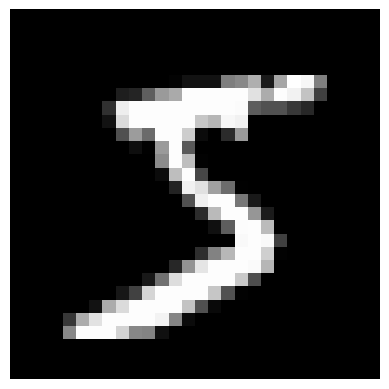

Label 5


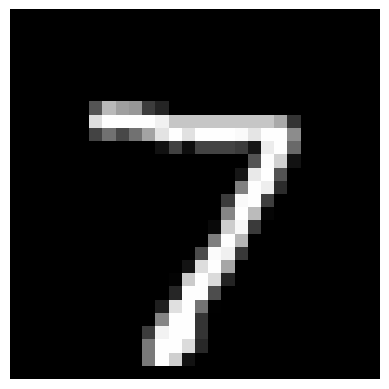

Label 7


In [6]:
## Define a function that displays a digit given its vector representation
def show_digit(x):
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
    return

## Define a function that takes an index into a particular data set ("train" or "test") and displays that image.
def vis_image(index, dataset="train"):
    if(dataset=="train"): 
        show_digit(train_data[index,])
        label = train_labels[index]
    else:
        show_digit(test_data[index,])
        label = test_labels[index]
    print("Label " + str(label))
    return

## View the first data point in the training set
vis_image(0, "train")

## Now view the first data point in the test set
vis_image(0, "test")

## Splitting the Train data to Train and Validate Sets

In [19]:
from sklearn.model_selection import train_test_split
trainx, valx, trainy, valy = train_test_split(train_data, train_labels, test_size=0.20, random_state=42)

NameError: name 'train_data' is not defined

## 1. K-Nearest neighbor classifier--Brute Force Approach

Use the built-in KNN classifier to perform handwritten digit classification task. Please keep in mind that any hyper-parameter selection shall be performed on the independent validation set and not on the test set. You need to study the KNeighborsClassifier documentation to understand how to use the api with different parameters. In this set of experiments, you need to select 'brute' for the **algorithm** parameter. Record the error rates on the test set and the cpu time taken for evaluation.

**Note:** Here you don't have to implement the KNN classifier but you just need to use it from ``sklearn`` library.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

### START CODE HERE ###
# Initialize the KNN classifier with brute force algorithm, Euclidean distance metric and k=3 (you can change k as needed)
knn = KNeighborsClassifier(n_neighbors=1, algorithm='brute', metric='euclidean')

# Start the timer
start_time = time.time()

# Train the classifier on the training data
knn.fit(trainx, trainy)

# Predict the labels for the validation set
val_pred = knn.predict(valx)

# Calculate the validation accuracy
val_accuracy = accuracy_score(valy, val_pred)

# Calculate the time taken for evaluation
elapsed_time = time.time() - start_time

# Print the results
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Time Taken: {elapsed_time:.4f} seconds")
### END CODE HERE ###

Validation Accuracy: 0.9741
Time Taken: 11.2872 seconds


## 2. Faster nearest neighbor methods

Performing nearest neighbor classification in the way we have presented requires a full pass through the training set in order to classify a single point. If there are $N$ training points in $\mathbb{R}^d$, this takes $O(N d)$ time.

Fortunately, there are faster methods to perform nearest neighbor look up if we are willing to spend some time preprocessing the training set. `scikit-learn` has fast implementations of two useful nearest neighbor data structures: the _ball tree_ and the _k-d tree_. Record the error rates on the test set and the cpu time taken for evaluation using these two faster methods.

**Note:** You need to select 'ball_tree'or 'kd_tree' for the **algorithm** parameter for ``KNeighborsClassifier`` classifier.

In [19]:
# You can use KNeighborsClassifier with correct values for 'algorithm'
### START CODE HERE ###
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# List to store results for both methods
results = []

# Combining the training and validation sets for final training
final_trainx = np.concatenate((trainx, valx))
final_trainy = np.concatenate((trainy, valy))

# Define the algorithms to test
algorithms = ['ball_tree', 'kd_tree']

for algo in algorithms:
    # Initialize the KNN classifier with the specific algorithm
    knn = KNeighborsClassifier(n_neighbors=1, algorithm=algo, metric='euclidean')
    
    # Start time
    start_time = time.time()
    
    # Train the classifier
    knn.fit(final_trainx, final_trainy)
    
    # Predict on the test set
    test_pred = knn.predict(test_data)
    
    # Calculate test accuracy
    test_accuracy = accuracy_score(test_labels, test_pred)
    
    # Calculate time taken
    elapsed_time = time.time() - start_time
    
    # Store results
    results.append({
        'Algorithm': algo,
        'Test Accuracy': test_accuracy,
        'Error Rate': 1 - test_accuracy,
        'Time Taken': elapsed_time
    })
    
    # Print results
    print(f"Algorithm: {algo}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Error Rate: {1 - test_accuracy:.4f}")
    print(f"Time Taken: {elapsed_time:.4f} seconds\n")

# Display all results
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)
### END CODE HERE ###

Algorithm: ball_tree
Test Accuracy: 0.9705
Error Rate: 0.0295
Time Taken: 561.9257 seconds

Algorithm: kd_tree
Test Accuracy: 0.9705
Error Rate: 0.0295
Time Taken: 716.6293 seconds

   Algorithm  Test Accuracy  Error Rate  Time Taken
0  ball_tree         0.9705      0.0295  561.925722
1    kd_tree         0.9705      0.0295  716.629251


## 3. Record CPU time and accuracy for all the three approaches in different datasets

Use brute-force, kd-tree, and ball-tree approaches for the following datasets and record the accuracies and cpu time (for evaluation step only). Looking at the results, can you explain it.

Datasets:
1. Abalone Data Set (https://archive.ics.uci.edu/ml/datasets/abalone)
2. Statlog (Landsat Satellite) Data Set (https://archive.ics.uci.edu/ml/datasets/Statlog+(Landsat+Satellite))

**Note:** The datasets are provided as attachement in the assignment as CSV files.

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

data = np.genfromtxt('Abalone19.csv', delimiter = ',')
data = data[:,1:]
X=data[:,:-1]
y=data[:,-1]
y = y.astype(np.int64)
trainx, tempx, trainy, tempy = train_test_split(X, y, test_size=0.30, random_state=42)
valx, testx, valy, testy = train_test_split(tempx, tempy, test_size=0.5, random_state=42)

scaler = StandardScaler()

trainx = scaler.fit_transform(trainx)
valx = scaler.fit_transform(valx)
testx = scaler.fit_transform(testx)

algorithms = ['brute', 'kd_tree', 'ball_tree']

k_values = [29,31,33,35,37,39,41,43]

best_k = 0
val_acc = 0
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    knn.fit(trainx, trainy)
    y_pred = knn.predict(valx)
    acc = accuracy_score(y_pred,valy)
    if acc  > val_acc:
        best_k = k
        val_acc = acc

for algorithm in algorithms:
    knn = KNeighborsClassifier(n_neighbors=best_k, algorithm=algorithm)
    knn.fit(trainx, trainy)
    start_time = time.time()
    y_pred = knn.predict(testx)
    end_time = time.time()
    acc = accuracy_score(y_pred,testy)
    # print(acc)
    print(end_time - start_time)
    

    
    
    


0.0069811344146728516
0.02992081642150879
0.0334169864654541


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

data = np.genfromtxt('Abalone19.csv', delimiter = ',')
data = data[:,1:]
X=data[:,:-1]
y=data[:,-1]
y = y.astype(np.int64)
trainx, tempx, trainy, tempy = train_test_split(X, y, test_size=0.30, random_state=42)
valx, testx, valy, testy = train_test_split(tempx, tempy, test_size=0.5, random_state=42)

scaler = StandardScaler()

# trainx = scaler.fit_transform(trainx)
# valx = scaler.fit_transform(valx)
# testx = scaler.fit_transform(testx)

algorithms = ['brute', 'kd_tree', 'ball_tree']

k_values = [29,31,33,35,37,39,41,43]

best_k = 0
val_acc = 0
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    knn.fit(trainx, trainy)
    y_pred = knn.predict(valx)
    acc = accuracy_score(y_pred,valy)
    if acc  > val_acc:
        best_k = k
        val_acc = acc

for algorithm in algorithms:
    knn = KNeighborsClassifier(n_neighbors=best_k, algorithm=algorithm)
    knn.fit(trainx, trainy)
    start_time = time.time()
    y_pred = knn.predict(testx)
    end_time = time.time()
    acc = accuracy_score(y_pred,testy)
    # print(acc)
    print(end_time - start_time)
    

    
    
    


In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import time

def load_and_preprocess_data(file_path, target_column_index):
    # Load the data
    data = np.genfromtxt(file_path, delimiter=',', dtype=str)
    
    # Separate features and target
    X = np.delete(data, target_column_index, axis=1)
    y = data[:, target_column_index]
    
    # Encode categorical variables if necessary
    le = LabelEncoder()
    for i in range(X.shape[1]):
        if X[:, i].dtype == 'object':
            X[:, i] = le.fit_transform(X[:, i])
    y = le.fit_transform(y)
    
    # Convert X to float
    X = X.astype(float)
    
    # Scale the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    return X, y

def evaluate_knn(X_train, X_test, y_train, y_test, algorithm, k=5):
    knn = KNeighborsClassifier(n_neighbors=k, algorithm=algorithm)
    knn.fit(X_train, y_train)
    
    # Measure evaluation time
    start_time = time.time()
    y_pred = knn.predict(X_test)
    eval_time = time.time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, eval_time

# Load and preprocess datasets
abalone_X, abalone_y = load_and_preprocess_data('abalone19.csv', -1)  # Assuming 'Rings' is the last column
satellite_X, satellite_y = load_and_preprocess_data('186_satimage.csv', -1)  # Assuming 'Class' is the last column

datasets = [
    ("Abalone", abalone_X, abalone_y),
    ("Satellite", satellite_X, satellite_y)
]

algorithms = ['brute', 'kd_tree', 'ball_tree']
results = []

# Evaluate each dataset
for dataset_name, X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    for algorithm in algorithms:
        accuracy, eval_time = evaluate_knn(X_train, X_test, y_train, y_test, algorithm)
        results.append((dataset_name, algorithm, accuracy, eval_time))

# Display results
print("Dataset | Algorithm | Accuracy | Evaluation Time")
print("-" * 50)
for result in results:
    print(f"{result[0]} | {result[1]} | {result[2]:.4f} | {result[3]:.4f}s")

# Analyze results
for dataset in ['Abalone', 'Satellite']:
    print(f"\nAnalysis for {dataset} dataset:")
    dataset_results = [r for r in results if r[0] == dataset]
    fastest_algo = min(dataset_results, key=lambda x: x[3])
    most_accurate_algo = max(dataset_results, key=lambda x: x[2])
    
    print(f"Fastest algorithm: {fastest_algo[1]} (Time: {fastest_algo[3]:.4f}s)")
    print(f"Most accurate algorithm: {most_accurate_algo[1]} (Accuracy: {most_accurate_algo[2]:.4f})")

ValueError: could not convert string to float: np.str_('M')

## E1. Extra Stuff

You are invited to try some more ideas as extra work like:
1. Instead of using the pixels as features, implement your own features (example: what were presented in the slides) and use them for KNN. You need to keep in mind that if you compute features which have different scales then it is important to scale/normalize the features (discussed in the slides).

In [24]:
import numpy as np

def extract_custom_features(images):
    features = []
    for image in images:
        # Reshape the image from 1D (784,) to 2D (28, 28)
        img = image.reshape((28, 28))
        
        # Feature 1: Average intensity
        avg_intensity = np.mean(img)
        
        # Feature 2: Standard deviation of intensity
        std_intensity = np.std(img)
        
        # Feature 3: Horizontal symmetry
        horz_symmetry = np.mean(np.abs(img - np.fliplr(img)))
        
        # Feature 4: Vertical symmetry
        vert_symmetry = np.mean(np.abs(img - np.flipud(img)))
        
        # Feature 5: Aspect ratio
        aspect_ratio = float(np.count_nonzero(img.sum(axis=0))) / np.count_nonzero(img.sum(axis=1))
        
        # Combine features into a single vector
        feature_vector = [avg_intensity, std_intensity, horz_symmetry, vert_symmetry, aspect_ratio]
        features.append(feature_vector)
    
    return np.array(features)

# Example usage with the training data
train_custom_features = extract_custom_features(train_data)
test_custom_features = extract_custom_features(test_data)


In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the custom features
train_custom_features_scaled = scaler.fit_transform(train_custom_features)
test_custom_features_scaled = scaler.transform(test_custom_features)


NameError: name 'train_custom_features' is not defined

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_custom_features_scaled, train_labels, test_size=0.2, random_state=42)

# Initialize the KNN classifier with a specific algorithm
knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the validation set
val_pred = knn.predict(X_val)

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val, val_pred)
print(f"Validation Accuracy with Custom Features: {val_accuracy:.4f}")

# Predict on the test set
test_pred = knn.predict(test_custom_features_scaled)

# Calculate test accuracy
test_accuracy = accuracy_score(test_labels, test_pred)
print(f"Test Accuracy with Custom Features: {test_accuracy:.4f}")


Validation Accuracy with Custom Features: 0.3576
Test Accuracy with Custom Features: 0.3609


In [17]:
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
def extract_advanced_features(images):
    features = []
    for image in images:
        # Reshape the image from 1D (784,) to 2D (28, 28)
        img = image.reshape((28, 28))
        
        # Feature 1: Zoning Features (7x7 grid)
        zones = []
        for i in range(0, 28, 7):
            for j in range(0, 28, 7):
                zone = img[i:i+7, j:j+7]
                zone_avg = np.mean(zone)
                zones.append(zone_avg)
        
        # Feature 2: HOG Features
        # Check if 'multichannel' parameter is supported
        try:
            # For newer versions of skimage, use 'multichannel=False'
            fd = hog(img, orientations=8, pixels_per_cell=(7, 7),
                     cells_per_block=(1, 1), visualize=False, multichannel=False)
        except TypeError:
            # For older versions, remove 'multichannel' parameter
            fd = hog(img, orientations=8, pixels_per_cell=(7, 7),
                     cells_per_block=(1, 1), visualize=False)
        
        # Combine features into a single vector
        feature_vector = zones + fd.tolist()
        features.append(feature_vector)
    
    return np.array(features)

# Extract advanced features
train_advanced_features = extract_advanced_features(train_data)
test_advanced_features = extract_advanced_features(test_data)

# Scale the features
scaler = StandardScaler()
train_advanced_features_scaled = scaler.fit_transform(train_advanced_features)
test_advanced_features_scaled = scaler.transform(test_advanced_features)

# Train and evaluate the KNN model
X_train, X_val, y_train, y_val = train_test_split(train_advanced_features_scaled, train_labels, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn.fit(X_train, y_train)

# Validation accuracy
val_pred = knn.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)
print(f"Validation Accuracy with Advanced Features: {val_accuracy:.4f}")

# Test accuracy
test_pred = knn.predict(test_advanced_features_scaled)
test_accuracy = accuracy_score(test_labels, test_pred)
print(f"Test Accuracy with Advanced Features: {test_accuracy:.4f}")


Validation Accuracy with Advanced Features: 0.9261
Test Accuracy with Advanced Features: 0.9260


## Points to remember

You need to keep in mind the following points:
1. Use numpy arrays and numpy libraries for efficient computations. 